In [16]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
may = pd.read_csv('../data/may.csv/may.csv')

In [18]:
may.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [19]:
may_scooters = may.loc[may.sumdgroup.isin(['scooter', 'Scooter'])]

In [20]:
may_scooters = may_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [21]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   chargelevel  float64
 5   companyname  object 
dtypes: float64(3), object(3)
memory usage: 1.1+ GB


In [22]:
may_scooters.to_pickle("../data/may.pkl")

In [23]:
may_scooters.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247000,36.136822,-86.799877,PoweredLIRL1,93.0,Bird
1,2019-05-01 00:01:41.247000,36.191252,-86.772945,PoweredXWRWC,35.0,Bird
2,2019-05-01 00:01:41.247000,36.144752,-86.806293,PoweredMEJEH,90.0,Bird
3,2019-05-01 00:01:41.247000,36.162056,-86.774688,Powered1A7TC,88.0,Bird
4,2019-05-01 00:01:41.247000,36.150973,-86.783109,Powered2TYEF,98.0,Bird


In [24]:
date = may_scooters["pubdatetime"].str.split(" ", n = 1, expand = True)

In [25]:
may_scooters['date'] = date[0]

In [26]:
may_scooters['time'] = date[1]

In [27]:
may_scooters.drop(columns=['pubdatetime'], inplace = True)

In [28]:
may_scooters.head()

,latitude,longitude,sumdid,chargelevel,companyname,date,time
0,36.136822,-86.799877,PoweredLIRL1,93.0,Bird,2019-05-01,00:01:41.247000
1,36.191252,-86.772945,PoweredXWRWC,35.0,Bird,2019-05-01,00:01:41.247000
2,36.144752,-86.806293,PoweredMEJEH,90.0,Bird,2019-05-01,00:01:41.247000
3,36.162056,-86.774688,Powered1A7TC,88.0,Bird,2019-05-01,00:01:41.247000
4,36.150973,-86.783109,Powered2TYEF,98.0,Bird,2019-05-01,00:01:41.247000


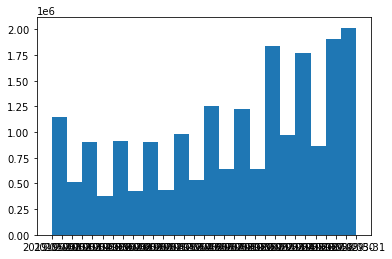

In [29]:
plt.hist('date', bins = 20, data = may_scooters);

In [30]:
may_scooters.isnull().sum()

latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
date             0
time             0
dtype: int64

In [38]:
scooter_names_may = may_scooters.sumdid.nunique()

In [34]:
scooter_count_may = may_scooters.sumdid.value_counts()

In [35]:
scooter_count_may.head()

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
Name: sumdid, dtype: int64

In [40]:
may_scooters.companyname.value_counts()

Lime      7111655
Bird      4334006
Lyft      3112581
Jump      2984630
Spin      1301001
Gotcha     915314
Bolt       524395
Name: companyname, dtype: int64

In [41]:
may_scooters = may_scooters[['sumdid', 'companyname','date','time','latitude', 'longitude', 'chargelevel']]

In [42]:
may_scooters.head()

,sumdid,companyname,date,time,latitude,longitude,chargelevel
0,PoweredLIRL1,Bird,2019-05-01,00:01:41.247000,36.136822,-86.799877,93.0
1,PoweredXWRWC,Bird,2019-05-01,00:01:41.247000,36.191252,-86.772945,35.0
2,PoweredMEJEH,Bird,2019-05-01,00:01:41.247000,36.144752,-86.806293,90.0
3,Powered1A7TC,Bird,2019-05-01,00:01:41.247000,36.162056,-86.774688,88.0
4,Powered2TYEF,Bird,2019-05-01,00:01:41.247000,36.150973,-86.783109,98.0


bird_scooters_may = may_scooters.loc[may_scooters['companyname'] == 'Bird'].sum()
df.pivot(index='foo', columns='bar', values='baz')

In [ ]:
may_scooters.pivot(index = 'company name', columns = 'companyname', values = 'sumdid')